In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv("red_wine.csv")
df

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low
...,...,...,...,...
566,0.40,0.70,12.7,low
567,0.28,0.60,12.8,high
568,0.31,0.60,12.8,high
569,0.34,0.72,12.8,low


In [5]:
red_wine = ProfileReport(df, title="Red Wine Data Analysis", explorative=True)
red_wine.to_file("red_wine_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [9]:
X = df.drop(columns=['type'])  
y = df['type']

In [10]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel='linear', probability=True),
    "SVM-RBF": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier()
}

In [13]:
results = {}

for name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=10, method="predict_proba")[:,1]
    auc = roc_auc_score(y, y_pred)
    acc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    results[name] = {"AUC": auc, "Accuracy": acc}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                          AUC  Accuracy
Logistic Regression  0.870332  0.784785
Naive Bayes          0.882481  0.821627
Decision Tree        0.753385  0.753267
SVM-Linear           0.868756  0.791863
SVM-RBF              0.848962  0.535844
Random Forest        0.866466  0.805868


In [14]:
majority_class = y.value_counts().idxmax()
baseline_acc = y.value_counts().max() / len(y)
baseline_auc = 0.5

results_df.loc["Baseline"] = {"AUC": baseline_auc, "Accuracy": baseline_acc}
print(results_df)

                          AUC  Accuracy
Logistic Regression  0.870332  0.784785
Naive Bayes          0.882481  0.821627
Decision Tree        0.753385  0.753267
SVM-Linear           0.868756  0.791863
SVM-RBF              0.848962  0.535844
Random Forest        0.866466  0.805868
Baseline             0.500000  0.528897


In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X, y)
y_probs = rf.predict_proba(X)[:, 1]


In [17]:
from sklearn.preprocessing import LabelEncoder

# Convert 'high' and 'low' into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 'low' -> 0, 'high' -> 1


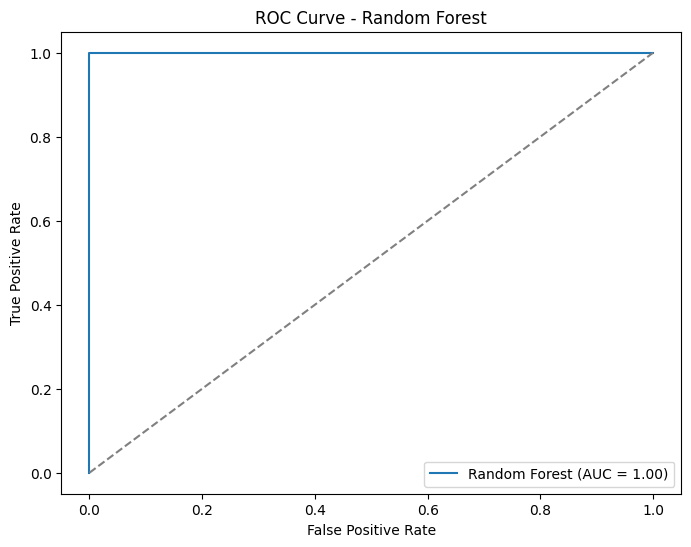

In [20]:
%matplotlib inline
fpr, tpr, _ = roc_curve(y, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y, y_probs)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
#plt.show()
